In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import utils
%matplotlib inline

### Load Data:

In [2]:
data1 = pd.read_csv('data\winemag-data_first150k.csv')
print(data1.columns.values)

['Unnamed: 0' 'country' 'description' 'designation' 'points' 'price'
 'province' 'region_1' 'region_2' 'variety' 'winery']


In [3]:
data = data1.set_index('Unnamed: 0', drop=True)

In [4]:
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
Unnamed: 0,,,,,,,,,,
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Data Overview
### Meaning of each column:

**1) country:** The country that the wine is from.<br>
**2) description:** A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.<br>
**3) designation:** The vineyard within the winery where the grapes that made the wine are from.<br>
**4) points:** The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)<br>
**5) price:** The cost for a bottle of the wine. <br>
**6) province:** The province or state that the wine is from.<br>
**7) region_1:** The wine growing area in a province or state (ie Napa).<br>
**8) region_2:** Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.<br>
**9) variety:** The type of grapes used to make the wine (ie Pinot Noir). <br>
**10) winery:** The winery that made the wine. <br>

**Missing Values:**

In [5]:
N = data.shape[0]
print('NaN counts: (total rows={})'.format(N))
for c in data.columns.values:
    print('{}: {}'.format(c, sum(data[c].isnull())))

NaN counts: (total rows=150930)
country: 5
description: 0
designation: 45735
points: 0
price: 13695
province: 5
region_1: 25060
region_2: 89977
variety: 0
winery: 0


In [6]:
i1 = data.country.index[data.country.isnull()==True]
i2 = data.province.index[data.province.isnull()==True]
np.array(i1!=i2).astype(int).sum()

0

The rows with missing country also don't show province. Since only very few data points have these two missing values, we can probably just discard them if they are not very useful.

#### Value Types:

In [7]:
for c in data.columns.values:
    print('{}: {}'.format(c, data[c].dtype))

country: object
description: object
designation: object
points: int64
price: float64
province: object
region_1: object
region_2: object
variety: object
winery: object


#### Unique Value Counts:

In [8]:
print('(Total rows= {})'.format(N))
for c in data.columns.values:
    print('{}: {}'.format(c, len(data[c].unique())))

(Total rows= 150930)
country: 49
description: 97821
designation: 30622
points: 21
price: 358
province: 456
region_1: 1237
region_2: 19
variety: 632
winery: 14810


#### 1) Country

In [9]:
N = data.shape[0]
country_counts = data.country.value_counts()/N * 100

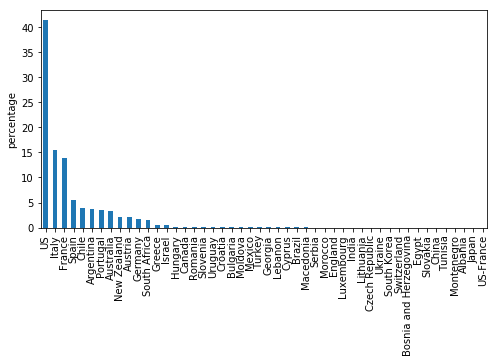

In [10]:
plt.figure(figsize=[8, 4])
country_counts.plot.bar()
plt.ylabel('percentage')
plt.show()

Since these data include reviews from many different countries, I want to re-group the data into simply five groups: US, Italy, France, and Other, where the last group gathers all the countries contribute less than 10%.

#### 2) Points & Prices

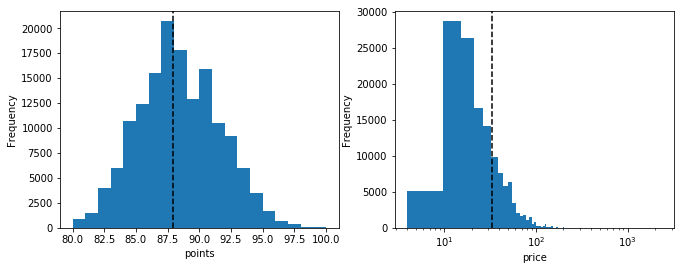

In [11]:
plt.figure(figsize=[11, 4])
plt.subplot(121)
data.points.plot.hist(bins=20)
plt.xlabel('points')
plt.axvline(np.mean(data.points), c='k', linestyle='--')
plt.subplot(122)
data.price.plot.hist(bins=400, logx=True)
plt.xlabel('price')
plt.axvline(np.mean(data.price), c='k', linestyle='--')
plt.show()

#### 3) Descriptions:

In [12]:
len_description = np.array([len(data.description[i]) for i in range(N)])

Min= 17; Max= 829


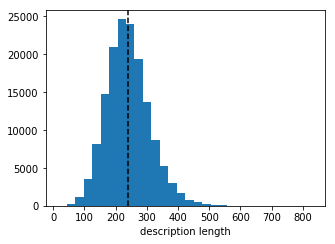

In [13]:
print('Min= {}; Max= {}'.format(min(len_description), max(len_description)))
plt.figure(figsize=[5, 3.6])
plt.hist(len_description, bins=30)
plt.axvline(np.mean(len_description), c='k', linestyle='--')
plt.xlabel('description length')
plt.show()

**Shortest and Longest descriptions:**

In [14]:
print('Shortest description:')
print(data.description[len_description==17])

Shortest description:
Unnamed: 0
116396    Sweet and fruity.
128156    Sweet and fruity.
Name: description, dtype: object


In [15]:
print('Longest description:')
print(data.description[len_description==829])

Longest description:
Unnamed: 0
22615    Dark, dusty, strongly scented with barrel toas...
Name: description, dtype: object


**Average description length for wine from different countries:**

In [16]:
print('Description average length:')
for c in data.country.unique():
    print('{}:\t{}'.format(c, data.description[data['country']==c].apply(len).mean()))

Description average length:
US:	241.95690497940606
Spain:	266.37106918238993
France:	214.96966537112522
Italy:	243.06670074111935
New Zealand:	238.4855421686747
Bulgaria:	229.1038961038961
Argentina:	259.1768779968034
Australia:	259.64978817833367
Portugal:	202.85231116121759
Israel:	264.8333333333333
South Africa:	260.21523472099204
Greece:	233.34728506787332
Chile:	264.3270288858322
Morocco:	262.9166666666667
Romania:	237.82014388489208
Germany:	250.65742251223492
Canada:	250.17857142857142
Moldova:	215.30985915492957
Hungary:	266.61038961038963
Austria:	218.72881910369642
Croatia:	244.37078651685394
Slovenia:	234.0
nan:	nan
India:	256.375
Turkey:	276.5
Macedonia:	233.375
Lebanon:	283.35135135135135
Serbia:	204.28571428571428
Uruguay:	249.40217391304347
Switzerland:	213.5
Albania:	221.0
Bosnia and Herzegovina:	204.25
Brazil:	203.4
Cyprus:	255.51612903225808
Lithuania:	255.5
Japan:	345.0
China:	208.0
South Korea:	308.0
Ukraine:	258.8
England:	348.0
Mexico:	241.63492063492063
Georgia:	

# Clean & Transform Data:
1) Delete data with missing "country".<br>
2) Re-group "country" into four categories.<br>
3) Rescale "point" to 0~20.<br>
4) Clean "description"

In [17]:
# Delete data with missing "country".
to_drop = data.country.index[data.country.isnull()==True]
data = data.drop(to_drop)
# Reset index
data = data.reset_index()

In [18]:
# Re-group "country" into four categories.
data.country = data.country.apply(lambda c: c if c in ['US', 'Italy', 'France'] else 'Other')

In [19]:
# Rescale "point":
data.points = data.points.apply(lambda x: x-80)
print('Min={}; Max={}'.format(min(data.points), max(data.points)))

Min=0; Max=20


### Text cleaning:
i) Use lowercase letters<br>
ii) Remove punctuations<br>
iii) Remove numbers<br>
iv) Tokenization (for bag-of-words model) <br>
v) Remove stop words (ie the, a, and, for...)<br>
vi) Transform into document-term matrix???

In [21]:
# Copy description to clean_description. (We will leave description unchanged.)
data['clean_des']= data.description

In [22]:
# Use lowercase letters
data.clean_des = data.clean_des.str.lower()

In [24]:
# Remove punctuations (I actually replace punctuations with space)
data.clean_des = data.clean_des.str.replace('[^\w\s]',' ')

In [26]:
# Remove numbers
data.clean_des = data.clean_des.str.replace('\d+', '')

In [32]:
# Tokenization:
data.clean_des = data.clean_des.str.split()

In [40]:
# Remove stop words
def filterStopWords(words):
    return [w for w in words if not w in stopwords.words('english')]

data.clean_des = data.clean_des.apply(lambda x: filterStopWords(x))

#### Store cleaned data for later use:

In [44]:
to_save = data.copy()
to_save.clean_des = to_save.clean_des.str.join(' ')

In [54]:
to_save.to_csv('data\clean_v1.csv', encoding='utf-8', index=False)

#### Load processed data:

In [2]:
data = utils.loadCleanData()

### Quick look into some correlation between columns:
#### Price vs Points:

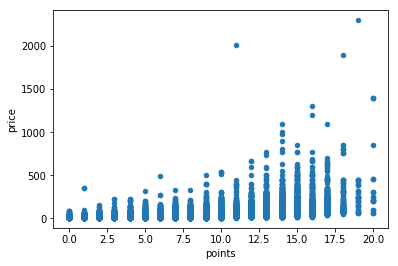

In [3]:
plt.figure()
data.plot.scatter(x='points', y='price')
plt.show()

#### Country vs Points:

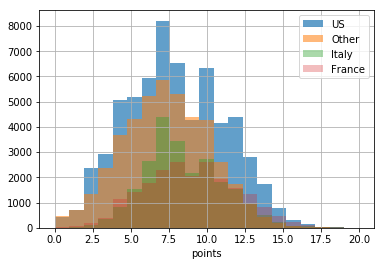

In [4]:
plt.figure()
data.points[data.country=='US'].hist(bins=21, alpha=0.7, label='US')
data.points[data.country=='Other'].hist(bins=21, alpha=0.55, label='Other')
data.points[data.country=='Italy'].hist(bins=21, alpha=0.4, label='Italy')
data.points[data.country=='France'].hist(bins=21, alpha=0.3, label='France')
plt.xlabel('points')
plt.legend()
plt.show()

#### Country vs Price:

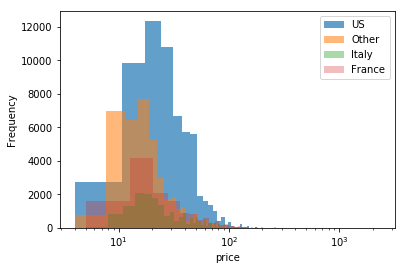

In [5]:
plt.figure()
data['price'][data.country=='US'].plot(kind='hist', bins=300, alpha=0.7, label='US', logx=True)
data['price'][data.country=='Other'].plot(kind='hist', bins=300, alpha=0.55, label='Other', logx=True)
data['price'][data.country=='Italy'].plot(kind='hist', bins=300, alpha=0.4, label='Italy', logx=True)
data['price'][data.country=='France'].plot(kind='hist', bins=300, alpha=0.3, label='France', logx=True)
plt.xlabel('price')
plt.legend()
plt.show()

Overall, there is a weak correlation between price and points, but not too big (wine with higher price doesn't gaurantee a higher score. And the price and points of wine from different countries also distribute quite similarly. So the remaining work is to really process the description of each wine. Here are the questions that I want to find out.

# Questions:
**1) What are the specialties of the wine from different countries?<br>**
**2) How does the wine taste with different type of grapes (variety)?<br>**
**3) What makes some wine more expensive or get higher score/point than the others?<br>**
**4) Is there any correlation between the taste of the wine and its price/score?**